In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from statsmodels.formula.api import ols
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from time import time
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
from scipy.stats import f
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from arch.unitroot import PhillipsPerron
from statsmodels.tsa.stattools import adfuller, kpss
import pmdarima as pm
from pmdarima import model_selection
#  Read the data and derive information about it
data = pd.read_excel('data_name_aqi.xlsx')
data.info()
# Calculate missing values
missing_count = data.isnull().sum()
missing_percentage = data.isnull().mean() * 100 
valid_counts = data.notnull().sum()
missing_stats = pd.DataFrame({
    'Missing Count': missing_count, 
    'Missing Percentage': missing_percentage, 
    'Valid Counts': valid_counts
})
missing_stats

data.interpolate(method='linear', inplace=True)

for column in data.columns:
    if pd.isnull(data[column].iloc[0]):
        data[column].iloc[0] = data[column].bfill().iloc[0]
    if pd.isnull(data[column].iloc[-1]):
        data[column].iloc[-1] = data[column].ffill().iloc[-1]
        # Check for missing values
missing_count = data.isnull().sum()
print (missing_count)
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  1461 non-null   datetime64[ns]
 1   temperature           1452 non-null   float64       
 2   atmospheric_pressure  1452 non-null   float64       
 3   relative_humidity     1452 non-null   float64       
 4   precipitation         1461 non-null   float64       
 5   wind_speed            1452 non-null   float64       
 6   CO                    1461 non-null   float64       
 7   NO2                   1461 non-null   int64         
 8   O3                    1461 non-null   int64         
 9   PM10                  1461 non-null   int64         
 10  PM2.5                 1461 non-null   int64         
 11  SO2                   1461 non-null   int64         
 12  AQI                   1461 non-null   int64         
dtypes: datetime64[ns](

C:\Users\Liu\AppData\Local\Temp\ipykernel_7828\713406459.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data[columns_of_interest].resample('M').mean()


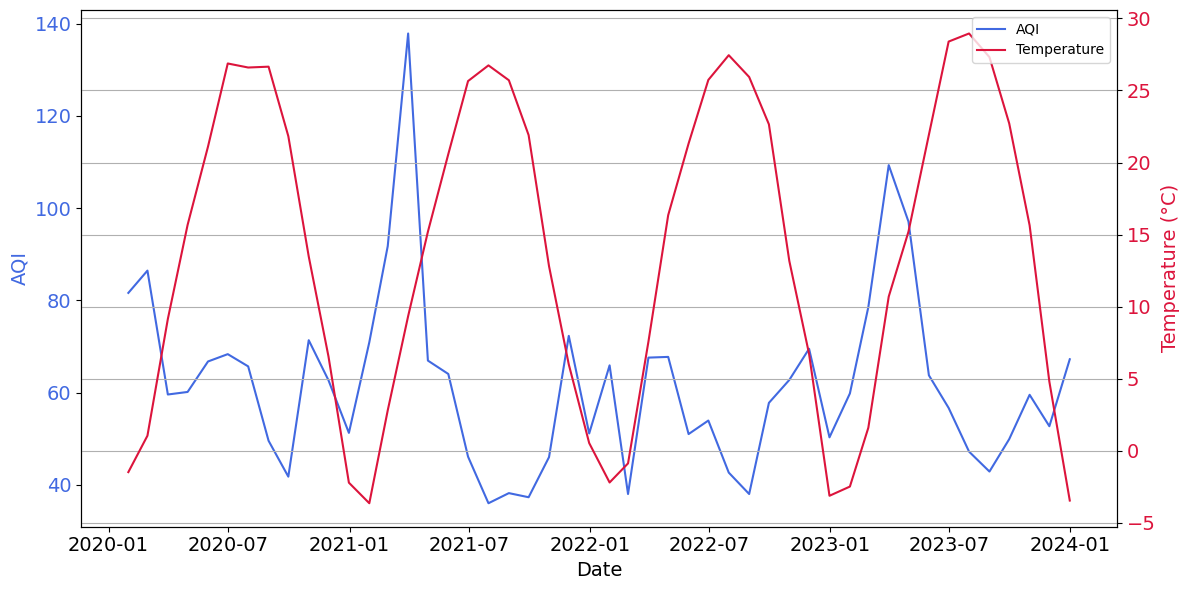

In [5]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

columns_of_interest = ['temperature', 'atmospheric_pressure', 'relative_humidity',
                       'precipitation', 'wind_speed', 'AQI']
monthly_data = data[columns_of_interest].resample('M').mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

pm25_line, = ax1.plot(monthly_data.index, monthly_data['AQI'], label='AQI', color='royalblue')
ax1.set_xlabel('Date', fontsize=14)  
ax1.set_ylabel('AQI', color='royalblue', fontsize=14)  
ax1.tick_params(axis='y', labelcolor='royalblue', labelsize=14) 
ax1.tick_params(axis='x', labelsize=14) 
ax2 = ax1.twinx()
temperature_line, = ax2.plot(monthly_data.index, monthly_data['temperature'], label='Temperature', color='crimson')
ax2.set_ylabel('Temperature (°C)', color='crimson', fontsize=14)  
ax2.tick_params(axis='y', labelcolor='crimson', labelsize=14)  

plt.title('')

fig.legend(handles=[pm25_line, temperature_line], loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

fig.tight_layout()
plt.grid(True)

output_path = 'C:/Users/Liu/Downloads/8_dissertation/11.png'
plt.savefig(output_path)
plt.show()


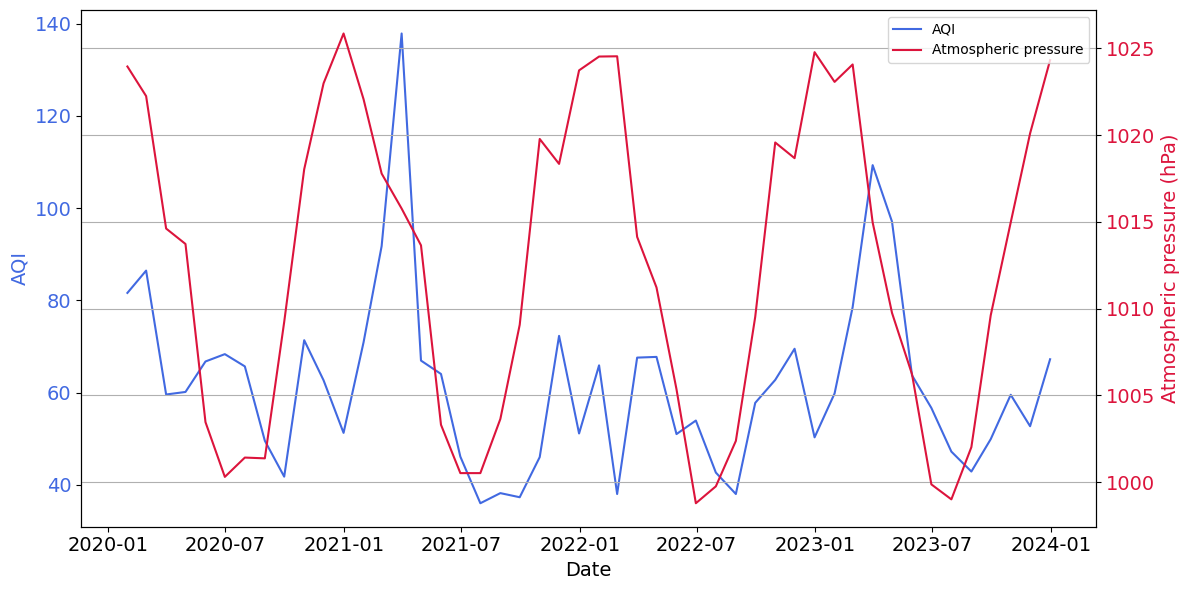

In [6]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# AQI plot
pm25_line, = ax1.plot(monthly_data.index, monthly_data['AQI'], label='AQI', color='royalblue')
ax1.set_xlabel('Date', fontsize=14) 
ax1.set_ylabel('AQI', color='royalblue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='royalblue', labelsize=14) 
ax1.tick_params(axis='x', labelsize=14)  

# Atmospheric pressure plot
ax2 = ax1.twinx()
temperature_line, = ax2.plot(monthly_data.index, monthly_data['atmospheric_pressure'], label='Atmospheric pressure', color='crimson')
ax2.set_ylabel('Atmospheric pressure (hPa)', color='crimson', fontsize=14) 
ax2.tick_params(axis='y', labelcolor='crimson', labelsize=14)  

plt.title('')

# Legend setup
fig.legend(handles=[pm25_line, temperature_line], loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

fig.tight_layout()
plt.grid(True)

# Save the figure
output_path = 'C:/Users/Liu/Downloads/8_dissertation/22.png'
plt.savefig(output_path)
plt.show()

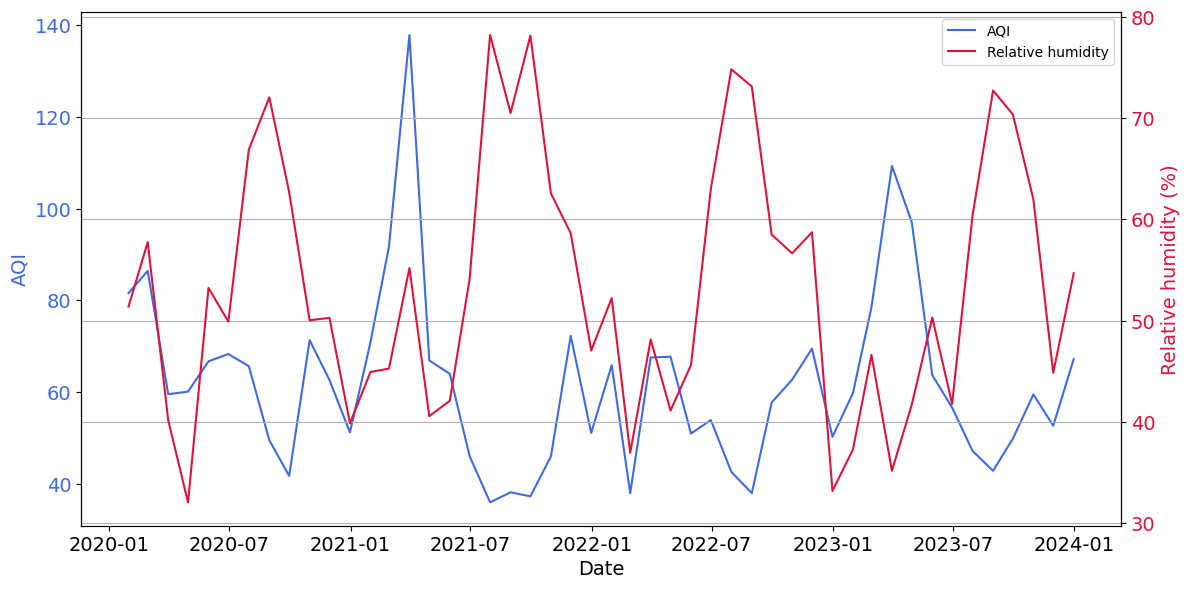

In [7]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# AQI plot
pm25_line, = ax1.plot(monthly_data.index, monthly_data['AQI'], label='AQI', color='royalblue')
ax1.set_xlabel('Date', fontsize=14)  
ax1.set_ylabel('AQI', color='royalblue', fontsize=14)  
ax1.tick_params(axis='y', labelcolor='royalblue', labelsize=14)  
ax1.tick_params(axis='x', labelsize=14)  

# Relative humidity plot
ax2 = ax1.twinx()
temperature_line, = ax2.plot(monthly_data.index, monthly_data['relative_humidity'], label='Relative humidity', color='crimson')
ax2.set_ylabel('Relative humidity (%)', color='crimson', fontsize=14)  
ax2.tick_params(axis='y', labelcolor='crimson', labelsize=14)  

plt.title('')

# Legend setup
fig.legend(handles=[pm25_line, temperature_line], loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

fig.tight_layout()
plt.grid(True)

# Save the figure
output_path = 'C:/Users/Liu/Downloads/8_dissertation/33.png'
plt.savefig(output_path)
plt.show()


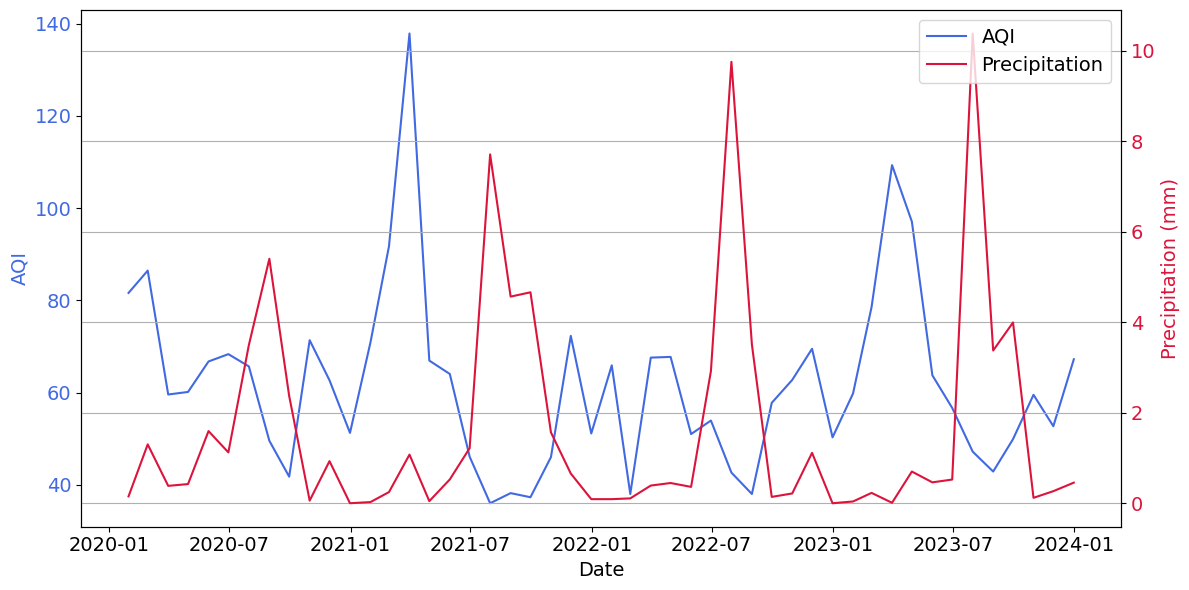

In [8]:

fig, ax1 = plt.subplots(figsize=(12, 6))

# AQI plot
pm25_line, = ax1.plot(monthly_data.index, monthly_data['AQI'], label='AQI', color='royalblue')
ax1.set_xlabel('Date', fontsize=14) 
ax1.set_ylabel('AQI', color='royalblue', fontsize=14)  
ax1.tick_params(axis='y', labelcolor='royalblue', labelsize=14)  
ax1.tick_params(axis='x', labelsize=14) 

# Precipitation plot
ax2 = ax1.twinx()
temperature_line, = ax2.plot(monthly_data.index, monthly_data['precipitation'], label='Precipitation', color='crimson')
ax2.set_ylabel('Precipitation (mm)', color='crimson', fontsize=14)  
ax2.tick_params(axis='y', labelcolor='crimson', labelsize=14)  

plt.title('')

# Legend setup
fig.legend(handles=[pm25_line, temperature_line], loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes, fontsize=14)

fig.tight_layout()
plt.grid(True)

# Save the figure
output_path = 'C:/Users/Liu/Downloads/8_dissertation/44.png'
plt.savefig(output_path)
plt.show()


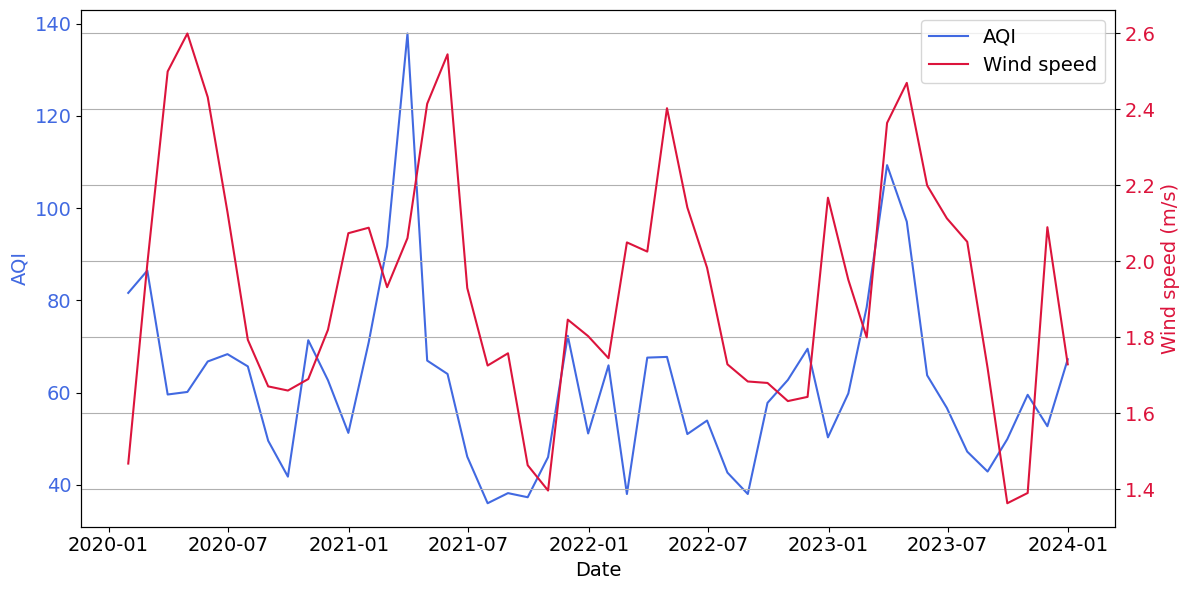

In [9]:

fig, ax1 = plt.subplots(figsize=(12, 6))

# AQI plot
pm25_line, = ax1.plot(monthly_data.index, monthly_data['AQI'], label='AQI', color='royalblue')
ax1.set_xlabel('Date', fontsize=14)  
ax1.set_ylabel('AQI', color='royalblue', fontsize=14) 
ax1.tick_params(axis='y', labelcolor='royalblue', labelsize=14) 
ax1.tick_params(axis='x', labelsize=14) 

# Wind speed plot
ax2 = ax1.twinx()
temperature_line, = ax2.plot(monthly_data.index, monthly_data['wind_speed'], label='Wind speed', color='crimson')
ax2.set_ylabel('Wind speed (m/s)', color='crimson', fontsize=14)  
ax2.tick_params(axis='y', labelcolor='crimson', labelsize=14) 

plt.title('')

# Legend setup
fig.legend(handles=[pm25_line, temperature_line], loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes, fontsize=14)

fig.tight_layout()
plt.grid(True)

# Save the figure
output_path = 'C:/Users/Liu/Downloads/8_dissertation/55.png'
plt.savefig(output_path)
plt.show()
